In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_train = pd.read_csv("../data_train.csv")
df_train = pd.DataFrame(csv_train)


df_time_offset = df_train["Timestamp"][0]
df_train["Timestamp"] = df_train["Timestamp"] - df_time_offset
df_train

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.000000,-0.000533,-0.007367,-1.004930,0.056593,0.056863,-0.007179,0.0,0.0,0.0,3.914032,-1.043402,-79.052986,0.771046,-0.020548,0.028752,0.635798
1,0.010010,0.000256,-0.007676,-1.004579,0.216010,-0.052095,0.076256,0.0,0.0,0.0,3.916178,-1.043974,-79.052254,0.771050,-0.020560,0.028768,0.635792
2,0.020020,-0.000181,-0.008547,-1.003267,0.110046,-0.048779,0.007200,0.0,0.0,0.0,3.917279,-1.044466,-79.052216,0.771050,-0.020564,0.028777,0.635791
3,0.030029,-0.002241,-0.007397,-1.004185,0.003117,-0.014962,0.024897,0.0,0.0,0.0,3.917306,-1.044632,-79.051979,0.771052,-0.020564,0.028779,0.635790
4,0.040039,-0.002911,-0.008018,-1.004997,-0.014294,0.057817,-0.029038,0.0,0.0,0.0,3.491152,-0.948038,-78.937088,0.771749,-0.018258,0.025746,0.635143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,49.960022,0.395614,0.179896,-0.922408,-48.989349,-278.695190,-218.831635,0.0,0.0,0.0,-2.240413,19.258068,81.310791,0.745680,0.123578,-0.114315,-0.644687
4997,49.970032,0.404915,0.174231,-0.932003,-38.087608,-270.344879,-231.778198,0.0,0.0,0.0,-3.324034,16.444098,79.017860,0.760635,0.113091,-0.092027,-0.632594
4998,49.979980,0.458733,0.173645,-0.957194,-46.045216,-236.222946,-232.245438,0.0,0.0,0.0,-4.370082,13.931380,76.780670,0.774576,0.104922,-0.071483,-0.619608
4999,49.989990,0.516315,0.061244,-1.146862,-28.217978,-218.084564,-213.895218,0.0,0.0,0.0,-5.087178,11.598048,74.782570,0.786939,0.096376,-0.053386,-0.607115


In [3]:
POSE_MAP= {
    "rett": 0,
    "framover": 1,
    "bakover": 2,
    "venstre": 3,
    "hoyre": 4
}

In [4]:
def get_timestamp_and_pose(filename):
    rows = []
    with open(filename, "r") as f:
        lines = f.readlines()
        offset = float(lines[1].strip().split(";")[1]) # This offset is the duration spent in the video before recording of data begun.
        for l in lines[1:]:
            sep_row = l.strip().split(";")
            finished_row = [round(float(x)-offset,2) for x in sep_row[1:3]]
            finished_row.append(POSE_MAP[sep_row[3].lower()])
            rows.append(finished_row)
    return rows

[[0.0, 8.6, 0], [10.36, 21.08, 1], [21.96, 30.8, 2], [32.72, 41.24, 3], [43.88, 51.52, 4], [52.52, 58.64, 0]]


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

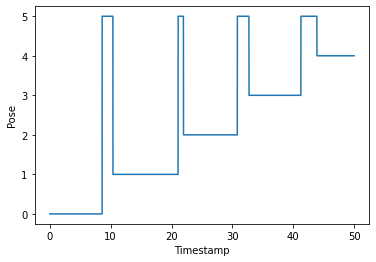

In [14]:
f_name = "../../data/simon_data_2.txt"
stamped_poses = get_timestamp_and_pose(f_name)
print(stamped_poses)

df_stamped_poses = []
index = 0
for stamp in df_train["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[index][1]:
            index += 1
        pose_id = stamped_poses[index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp < stamped_poses[index][0]:
            pose_id = 5
    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    df_stamped_poses.append(pose_id)

df_train["Pose"] = df_stamped_poses
y_train = df_stamped_poses
#print(df[2400:2500][:])

#df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x="Timestamp", y='Pose')

In [15]:
x_train = df_train.drop(['Timestamp'],axis=1)
x_train = x_train.drop(['Pose'],axis=1)
x_train

,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,-0.000533,-0.007367,-1.004930,0.056593,0.056863,-0.007179,0.0,0.0,0.0,3.914032,-1.043402,-79.052986,0.771046,-0.020548,0.028752,0.635798
1,0.000256,-0.007676,-1.004579,0.216010,-0.052095,0.076256,0.0,0.0,0.0,3.916178,-1.043974,-79.052254,0.771050,-0.020560,0.028768,0.635792
2,-0.000181,-0.008547,-1.003267,0.110046,-0.048779,0.007200,0.0,0.0,0.0,3.917279,-1.044466,-79.052216,0.771050,-0.020564,0.028777,0.635791
3,-0.002241,-0.007397,-1.004185,0.003117,-0.014962,0.024897,0.0,0.0,0.0,3.917306,-1.044632,-79.051979,0.771052,-0.020564,0.028779,0.635790
4,-0.002911,-0.008018,-1.004997,-0.014294,0.057817,-0.029038,0.0,0.0,0.0,3.491152,-0.948038,-78.937088,0.771749,-0.018258,0.025746,0.635143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.395614,0.179896,-0.922408,-48.989349,-278.695190,-218.831635,0.0,0.0,0.0,-2.240413,19.258068,81.310791,0.745680,0.123578,-0.114315,-0.644687
4997,0.404915,0.174231,-0.932003,-38.087608,-270.344879,-231.778198,0.0,0.0,0.0,-3.324034,16.444098,79.017860,0.760635,0.113091,-0.092027,-0.632594
4998,0.458733,0.173645,-0.957194,-46.045216,-236.222946,-232.245438,0.0,0.0,0.0,-4.370082,13.931380,76.780670,0.774576,0.104922,-0.071483,-0.619608
4999,0.516315,0.061244,-1.146862,-28.217978,-218.084564,-213.895218,0.0,0.0,0.0,-5.087178,11.598048,74.782570,0.786939,0.096376,-0.053386,-0.607115


In [16]:

print(y_train)
print(len(y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
csv_test = pd.read_csv("../data_test.csv")
df_test = pd.DataFrame(csv_test)
df_time_offset = df_test["Timestamp"][0]
df_test["Timestamp"] = df_test["Timestamp"] - df_time_offset
df_test

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,59.959995,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039
5997,59.969997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472
5998,59.980000,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764
5999,59.990002,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005


[[0.0, 12.28, 0], [12.6, 22.64, 1], [24.16, 31.64, 3], [32.76, 42.0, 4], [42.64, 58.64, 2]]


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

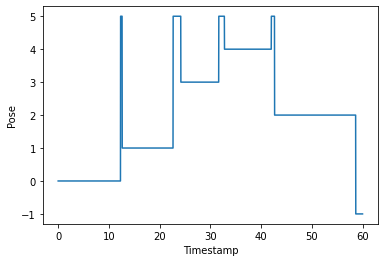

In [18]:
f_test = "../../data/simon_test_1.txt"
stamped_poses = get_timestamp_and_pose(f_test)
print(stamped_poses)

df_stamped_poses = []
index = 0
for stamp in df_test["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[index][1]:
            index += 1
        pose_id = stamped_poses[index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp < stamped_poses[index][0]:
            pose_id = 5
    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    df_stamped_poses.append(pose_id)
y_test = df_stamped_poses
df_test["Pose"] = df_stamped_poses
#print(df[2400:2500][:])

#df['Pose'].hist(bins=4)
sns.lineplot(data=df_test, x="Timestamp", y='Pose')

In [19]:
df_test

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z,Pose
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777,0
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930,0
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037,0
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159,0
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,59.959995,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039,-1
5997,59.969997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472,-1
5998,59.980000,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764,-1
5999,59.990002,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005,-1


In [20]:
x_test = df_test.drop(['Timestamp'],axis=1)
x_test = x_test.drop(['Pose'],axis=1)
x_test

,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777
1,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930
2,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037
3,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159
4,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039
5997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472
5998,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764
5999,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005


number of correct: 1596
number of guesses: 6001
% correct: 26.59556740543243
C: 10
[26.59556740543243]
[10]
number of correct: 1574
number of guesses: 6001
% correct: 26.228961839693383
C: 11
[26.59556740543243, 26.228961839693383]
[10, 11]
number of correct: 1296
number of guesses: 6001
% correct: 21.59640059990002
C: 12
[26.59556740543243, 26.228961839693383, 21.59640059990002]
[10, 11, 12]
number of correct: 1124
number of guesses: 6001
% correct: 18.730211631394766
C: 13
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766]
[10, 11, 12, 13]
number of correct: 1018
number of guesses: 6001
% correct: 16.96383936010665
C: 14
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665]
[10, 11, 12, 13, 14]
number of correct: 943
number of guesses: 6001
% correct: 15.714047658723546
C: 15
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546]
[10, 11, 12, 13, 14, 

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 33
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 34
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 44
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 45

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 53
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 60
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 67
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 73
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 78
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 83
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 755
number of guesses: 6001
% correct: 12.581236460589901
C: 88
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 93
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

number of correct: 754
number of guesses: 6001
% correct: 12.564572571238127
C: 97
[26.59556740543243, 26.228961839693383, 21.59640059990002, 18.730211631394766, 16.96383936010665, 15.714047658723546, 14.030994834194303, 13.581069821696385, 13.364439260123312, 13.364439260123312, 13.53107815364106, 13.347775370771538, 13.231128145309116, 13.131144809198467, 13.014497583736043, 12.914514247625398, 12.731211464755873, 12.647892017997, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.564572571238127, 12.

<AxesSubplot:xlabel='c', ylabel='%'>

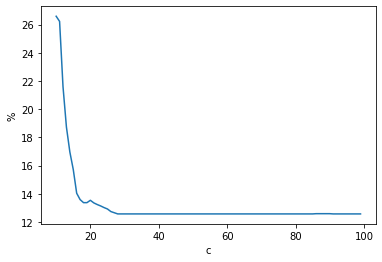

In [49]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#c = 10
#accuracy_array = []
#c_array = []
#for num in range(90):
    
#    model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto', C=0.3))
#    model.fit(x_train, y_train)
#    predictions = model.predict(x_test)
#    number_of_corrects = 0
   
#    for num in range(len(predictions)):
#        if(predictions[num] == y_test[num]):
#            number_of_corrects += 1

#    print("number of correct: {}".format(number_of_corrects))
#    print("number of guesses: {}".format(len(predictions)))
#    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
#    accuracy_array.append(number_of_corrects/len(predictions)*100)
#    c_array.append(c)
#    print("C: {}".format(c))
#    c += 1
#    print(accuracy_array)
#    print(c_array)

#resframe = pd.DataFrame({'c':c_array, '%':accuracy_array})
#resframe
    

#sns.lineplot(data=resframe,x="c",y="%")


In [50]:
model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto', C=0.3))
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [51]:
for num in range(len(predictions)):
    print(predictions[num])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


<AxesSubplot:xlabel='x', ylabel='y'>

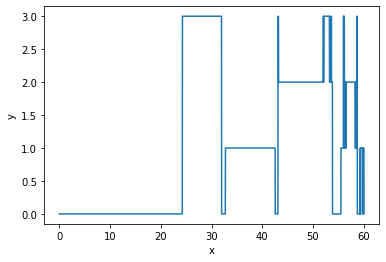

In [64]:
df_predict = pd.DataFrame({'x':df_test['Timestamp'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

[[   0   70   60    0    6    0    0]
 [   0 1229    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   0  210  101 1137  152    0    0]
 [   0    6    0    0  742    0    0]
 [   0    0  924    0    0    0    0]
 [   0  271   58    0   31    0    0]]
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       136
           0       0.44      1.00      0.61      1229
           1       0.00      0.00      0.00      1004
           2       1.00      0.71      0.83      1600
           3       0.80      0.99      0.88       748
           4       1.00      0.00      0.00       924
           5       1.00      0.00      0.00       360

    accuracy                           0.52      6001
   macro avg       0.75      0.39      0.33      6001
weighted avg       0.69      0.52      0.46      6001



<AxesSubplot:>

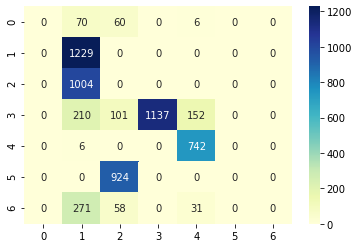

In [53]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

In [54]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 3108
number of guesses: 6001
% correct: 51.79136810531578
